<a href="https://colab.research.google.com/github/Dana-ys8/books/blob/master/BasicPBC_release.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BasicPBC Inference Demo
## Learning Inclusion Matching for Animation Paint Bucket Colorization (CVPR 2024)
<p align="left">
  <img src="https://github.com/ykdai/BasicPBC/raw/v0.1.0/assets/teaser.png" width=80%>
</p>
Yuekun Dai, Shangchen Zhou, Qinyue Li, Chongyi Li, Chen Change Loy

[![GitHub Stars](https://img.shields.io/github/stars/ykdai/BasicPBC?style=social)](https://github.com/ykdai/BasicPBC) [![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2403.18342)

# 1. Preparations
Before start, make sure that you choose
* Hardware Accelerator = GPU (in the Runtime menu -> Change runtime type)

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
# Clone BasicPBC and enter the CodeFormer folder
%cd /content
!rm -rf BasicPBC
!git clone https://github.com/ykdai/BasicPBC
%cd BasicPBC

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt

import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# Install basicsr
!python setup.py develop

# Download the pre-trained model
!python download_pretrained_models.py

/content
Cloning into 'BasicPBC'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 607 (delta 31), reused 33 (delta 26), pack-reused 540
Receiving objects: 100% (607/607), 22.25 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (259/259), done.
/content/BasicPBC
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.2 MB/s eta 0

&nbsp;
***
&nbsp;
# 2. Test on your images 😀
**How to use it:**
*   Put your images at the path `/content/BasicPBC/dataset/test`
*   Run the code like `python inference_line_frames.py --path dataset/test/laughing_girl/`. The results will be saved at `/content/BasicPBC/dataset/test/laughing_girl/laughing_girl`.


\\
**Notice**:
`inference_line_frames.py` provides several arguments for different use cases.  

- `--mode` can be either `forward` or `nearest`. By default, `forward` processes your frames sequentially. If set `nearest`, frames will be predicted from the nearest ***gt***. e.g. Given ***gt*** *0000.png* and *0005.png*, ***line*** *0003.png* will be colored according to *0004.png* and *0004.png* is colored according to *0005.png*.  
    ```bash
    python inference_line_frames.py --path dataset/test/smoke_explosion/  --mode nearest
    ```
- `--seg_type` is `default` if not specified. It's fast and simple, but not work if your ***line*** contains unclosed region. `trappedball` is robust to this case(acknowledge <a href="https://github.com/hepesu/LineFiller">@hepesu/LineFiller</a>). To decide which one to use, you can first set `default` together with `--save_color_seg`. It will produce colorized segmentation results. If you find out that some segments are not seperated properly, switch to `trappedball`:
    ```bash
    python inference_line_frames.py --path dataset/test/smoke_explosion/  --seg_type trappedball
    ```
- `--skip_seg` can help your skip the segmentation part. You can use it when `seg` already exists.
- `--keep_line` will generate another folder named `[your_clip]_keepline` which merges the original line in the `line` folder with the colorized output. This config is mainly for the line drawn not by the binary pen.
- `--raft_res` can change the resolution for the optical flow estimation (default is 320). We notice that sometimes the performance is bad due to he wrong optical flow estimation. Thus, if the performance is not satisfied on your case, you can change this to 640 to have a try by using `--raft_res 640`.
- `--use_light_model` will use the light-weighted model for inference. Add this if working on low memory GPU. Notice that this argument may produce poorer results than the base model.
- `--multi_clip` is used if you would like to inference on many clips at the same time. Put all clips within a single folder under `dataset/test/`, e.g.:
    ```
    ├── dataset
        ├── test
            ├── your_clip_folder
                ├── clip01
                ├── clip02
                ├── ...
    ```
    In this case, run:
    ```bash
    python inference_line_frames.py --path dataset/test/your_clip_folder/  --multi_clip
    ```

If BasicPBC is helpful, please help star our [repo](https://github.com/ykdai/BasicPBC). Thanks! 🤗


In [ ]:
!python inference_line_frames.py --path dataset/test/laughing_girl

In [ ]:
!python inference_line_frames.py --path dataset/test/smoke_explosion --mode nearest

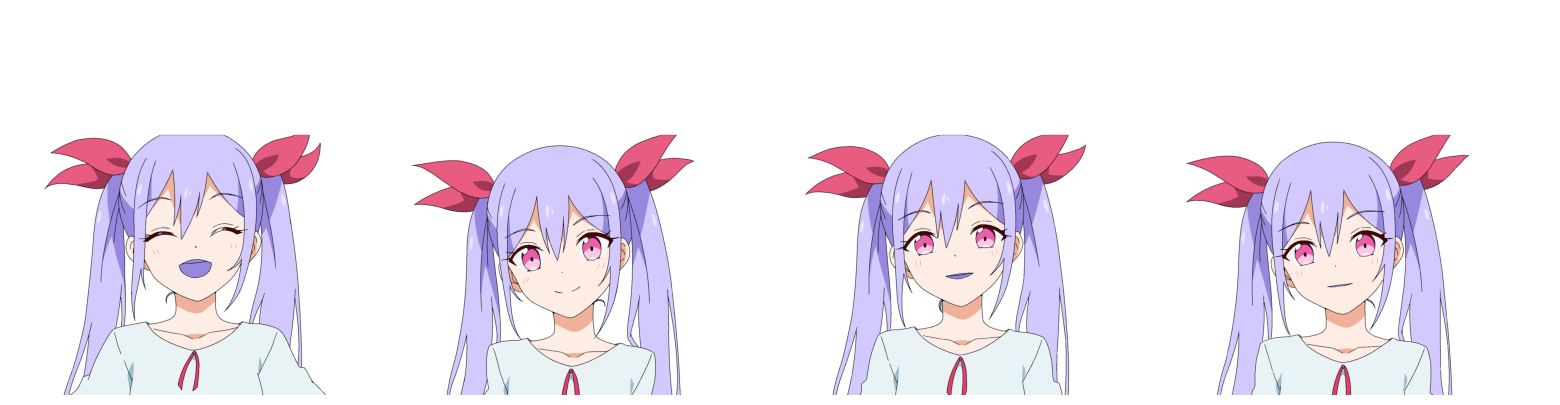

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

def concatenate_images(image_dir):

    # Get a list of image filenames in the directory
    image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]
    images = [Image.open(os.path.join(image_dir, filename)).convert('RGB') for filename in image_filenames]

    # Convert images to numpy arrays
    image_arrays = [np.array(image) for image in images]

    # Determine the number of rows needed
    num_images = len(image_arrays)
    num_cols = 4
    num_rows = math.ceil(num_images / num_cols)

    # Get the max width and height of the images to define the size of each cell in the grid
    max_height = max(image.shape[0] for image in image_arrays)
    max_width = max(image.shape[1] for image in image_arrays)
    canvas_height = max_height * num_rows
    canvas_width = max_width * num_cols
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # White background

    for idx, image in enumerate(image_arrays):
        row = idx // num_cols
        col = idx % num_cols
        start_y = row * max_height
        start_x = col * max_width
        canvas[start_y:start_y+image.shape[0], start_x:start_x+image.shape[1], :] = image

    plt.figure(figsize=(num_cols * 5, num_rows * 5))
    plt.imshow(canvas)
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage:
image_dir = '/content/BasicPBC/dataset/test/laughing_girl/laughing_girl'  # Modify this path to your actual directory
concatenate_images(image_dir)